# Importing Basic Package

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Load the data

In [21]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with customers to get customer details


In [23]:
merged_data = pd.merge(transactions, customers, on='CustomerID')


# Feature Engineering


In [25]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': ['sum', 'mean'],
    'ProductID': 'nunique'
}).reset_index()

customer_features.columns = ['CustomerID', 'TotalSpending', 'AvgTransactionValue', 'TotalQuantity', 'AvgQuantity', 'UniqueProducts']


# Merge with customer profile information


In [27]:
customer_features = pd.merge(customer_features, customers, on='CustomerID')


# Encode categorical variables (Region)


In [29]:
customer_features = pd.get_dummies(customer_features, columns=['Region'])


# Normalize the features


In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))


# Perform K-Means Clustering


In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\Sivasankar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Calculate DB Index


In [37]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.4226899038658989


# Visualize the clusters


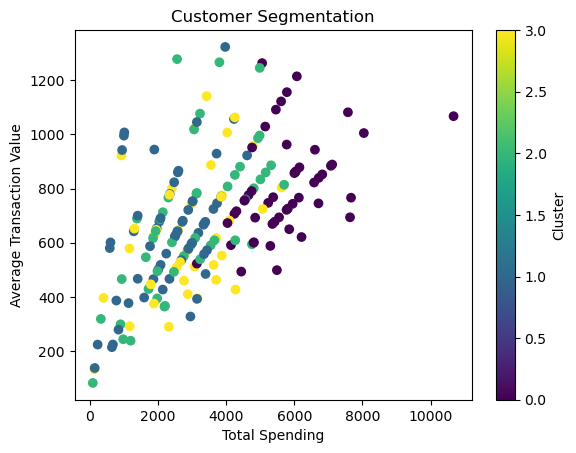

In [46]:
plt.scatter(customer_features['TotalSpending'], customer_features['AvgTransactionValue'], c=customer_features['Cluster'], cmap='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Average Transaction Value')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()


# Save clustering results


In [50]:
customer_features.to_csv('Rayvan_Kumar_V_Clustering.csv', index=False)